In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Importing data files

merged_data_df = pd.read_csv("Resources/merged_output.csv")
merged_data_df.head()

C:\Users\Uzma\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10,13,14,15,16,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Address,CO 1st Max Hour,CO 1st Max Value,CO AQI,CO Mean,CO Units,City,County,County Code,...,SO2 1st Max Hour,SO2 1st Max Value,SO2 AQI,SO2 Mean,SO2 Units,Site Num,State,State Code,Unnamed: 0.1,Year
0,0,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3516.0,2006.0
1,1,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3517.0,2006.0
2,2,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3518.0,2006.0
3,3,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3519.0,2006.0
4,4,2956-A TREAT BOULEVARD,21.0,1.1,0.0,0.578261,Parts per million,Concord,Alameda,6001.0,...,5.0,2.0,3.0,1.000000,Parts per billion,2.0,California,6.0,3520.0,2006.0


In [3]:
# Removing decimal and zero from 'Year' column
merged_data_df['Year'] = merged_data_df['Year'].astype(str).replace('\.0', '', regex=True)
merged_data_df.head()

,Unnamed: 0,Address,CO 1st Max Hour,CO 1st Max Value,CO AQI,CO Mean,CO Units,City,County,County Code,...,SO2 1st Max Hour,SO2 1st Max Value,SO2 AQI,SO2 Mean,SO2 Units,Site Num,State,State Code,Unnamed: 0.1,Year
0,0,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3516.0,2006
1,1,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3517.0,2006
2,2,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3518.0,2006
3,3,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3519.0,2006
4,4,2956-A TREAT BOULEVARD,21.0,1.1,0.0,0.578261,Parts per million,Concord,Alameda,6001.0,...,5.0,2.0,3.0,1.000000,Parts per billion,2.0,California,6.0,3520.0,2006


#### Generate a summary statistics table of mean, median, variance, 
#### standard deviation, and SEM for each pollutants verses county

#### Calculations for SO2 AQI:

In [4]:
# Group by County and aggregate mean, median, variance, standard deviation, and SEM of the SO2 AQI (Sulphur dioxide Air Quality Index) for each County.
stat_so2_df = merged_data_df.groupby(['County']).agg({'SO2 AQI': [np.max, np.min, np.mean, np.median, np.var, np.std, st.sem]})
stat_so2_df.head()

SO2 AQI                                                     
             amax amin      mean median        var       std       sem
County                                                                
Alameda      40.0  0.0  2.124361    0.0  12.945408  3.597973  0.043469
Amador       14.0  0.0  3.000000    0.0  16.400000  4.049691  0.632456
Butte        21.0  0.0  3.596774    1.0  27.689746  5.262105  0.472551
Calaveras    17.0  0.0  3.333333    0.0  23.105691  4.806838  0.741711
Colusa        0.0  0.0  0.000000    0.0   0.000000  0.000000  0.000000

In [5]:
# Rename columns for mean, median, variance, standard deviation, and SEM of the SO2 AQI (Sulphur dioxide Air Quality Index) for each County.

stat_so2_df.columns = ['Max_Value', 'Min_Value', 'Mean', 'Median', 'Variance', 'Standard_Deviation', 'Std_Error_of_Mean']
stat_so2_df.head()

,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation,Std_Error_of_Mean
County,,,,,,,
Alameda,40.0,0.0,2.124361,0.0,12.945408,3.597973,0.043469
Amador,14.0,0.0,3.000000,0.0,16.400000,4.049691,0.632456
Butte,21.0,0.0,3.596774,1.0,27.689746,5.262105,0.472551
Calaveras,17.0,0.0,3.333333,0.0,23.105691,4.806838,0.741711
Colusa,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [6]:
# Extracting County with the max value of SO2 AQI summary statistics.
so2_df = stat_so2_df.loc[stat_so2_df['Max_Value'].idxmax()]
so2_df

Max_Value             153.000000
Min_Value               0.000000
Mean                    1.081239
Median                  0.000000
Variance               14.821209
Standard_Deviation      3.849832
Std_Error_of_Mean       0.031597
Name: Imperial, dtype: float64

#### Visual Representation of Statistical Summary for 'Los Angeles' County

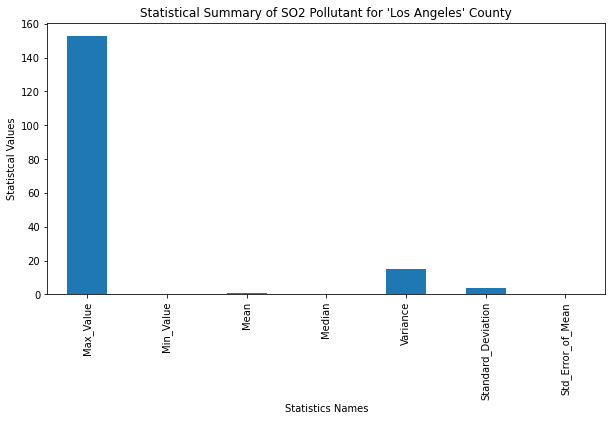

<Figure size 432x288 with 0 Axes>

In [7]:
# Use DataFrame.plot() in order to create a bar chart of the data
so2_df.plot(kind="bar", figsize=(10,5))

# Give our chart some labels and a tile
plt.title("Statistical Summary of SO2 Pollutant for 'Los Angeles' County")
plt.xlabel("Statistics Names")
plt.ylabel("Statistcal Values")
plt.show()
plt.tight_layout()